In [1]:
import numpy as np

In [2]:
np.random.gumbel([-1, -3])

array([-1.10490466, -1.58052217])

In [15]:
def softmax(x):
    log_den = np.logaddexp.reduce(x, -1)
    return np.exp(x - log_den)

In [16]:
def concrete_sample(loc, temp=1.):
    return softmax((loc + np.random.gumbel(np.zeros_like(loc))) / temp)

In [17]:
concrete_sample(np.array([-1., -2., -3.]), temp=1.)

array([ 0.01180938,  0.95652796,  0.03166265])

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
def plot_concrete_samples(loc, temp=1., nb_samples=5):
    nb_types = len(loc)
    if nb_types == 2:
        support = np.arange(0, nb_types)
    else:
        support = np.arange(1, nb_types + 1)
    cats = np.array([concrete_sample(loc, temp) for _ in range(nb_samples)])
    mean = cats.mean(0)
    plt.subplot(1, 2, 1, title='Concrete samples')
    for i, cat in enumerate(cats):
        plt.bar(support + (0.02 * i), cat, width=0.02, tick_label=support)
    plt.subplot(1, 2, 2, title='sample mean')
    #plt.title('Concrete(temp=%s): sample mean (N=%d)' % (temp, nb_samples))
    plt.bar(support, mean, width=0.02, tick_label=support, fill=False)

In [28]:
def binary_loc(p):
    """Convert a probability to a vector log([p, 1-p])"""
    assert 0 < p < 1, 'I need a number in the open (0,1)'
    return np.log(np.array([1 - p, p]))

def nary_loc(p):
    """Convert a probability vector to log(p)"""
    assert len(p) > 1, 'I need 2 or more classes'
    assert np.all(np.array(p) > 0.) and np.all(np.array(p) < 1.), 'I need probability values'
    assert np.sum(p) == 1., 'I need a normalised vector'
    return np.log(p)

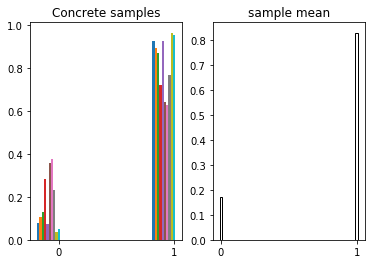

In [40]:
plot_concrete_samples(binary_loc(0.9), temp=1., nb_samples=10)

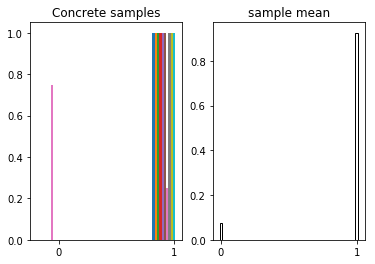

In [41]:
plot_concrete_samples(binary_loc(0.9), temp=0.1, nb_samples=10)

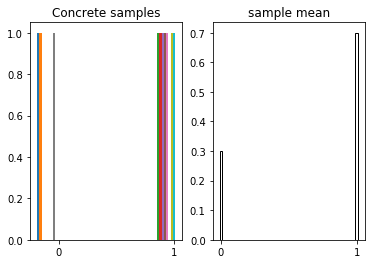

In [42]:
plot_concrete_samples(binary_loc(0.9), temp=0.001, nb_samples=10)

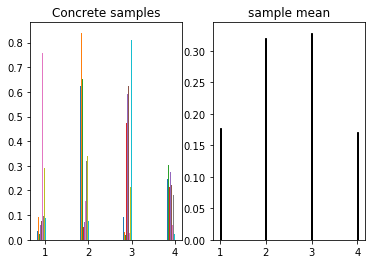

In [43]:
plot_concrete_samples(nary_loc([0.23, 0.27, 0.24, 0.26]), temp=1., nb_samples=10)

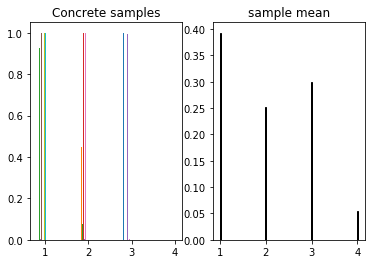

In [44]:
plot_concrete_samples(nary_loc([0.23, 0.27, 0.24, 0.26]), temp=0.1, nb_samples=10)

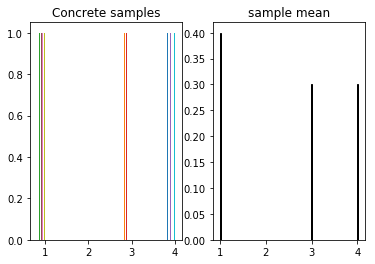

In [45]:
plot_concrete_samples(nary_loc([0.23, 0.27, 0.24, 0.26]), temp=0.001, nb_samples=10)